In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_excel_cleaned.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,four to five,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,four to five,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,four to five,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,four to five,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,four to five,Left wheel,Silver,4


In [4]:
del df['ID'] , df['Model']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  int64  
 9   Cylinders         19237 non-null  int64  
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memor

In [6]:
df.select_dtypes(['float64','int64'])

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,13328,1399.0,2010,3.5,186005,6,12
1,16621,1018.0,2011,3.0,192000,6,8
2,8467,NaN,2006,1.3,200000,4,2
3,3607,862.0,2011,2.5,168966,4,0
4,11726,446.0,2014,1.3,91901,4,4
...,...,...,...,...,...,...,...
19232,8467,NaN,1999,2.0,300000,4,5
19233,15681,831.0,2011,2.4,161600,4,8
19234,26108,836.0,2010,2.0,116365,4,4
19235,5331,1288.0,2007,2.0,51258,4,4


In [7]:
df['Prod. year'] = df['Prod. year'].astype('object')

In [8]:
df.select_dtypes(['float64','int64']).corr()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags
Price,1.000000,0.063291,0.008753,-0.001758,0.007518,-0.012824
Levy,0.063291,1.000000,0.648215,0.023624,0.588695,0.081107
Engine volume,0.008753,0.648215,1.000000,-0.006289,0.778524,0.224441
Mileage,-0.001758,0.023624,-0.006289,1.000000,-0.001768,-0.009201
Cylinders,0.007518,0.588695,0.778524,-0.001768,1.000000,0.176868
Airbags,-0.012824,0.081107,0.224441,-0.009201,0.176868,1.000000


<AxesSubplot:>

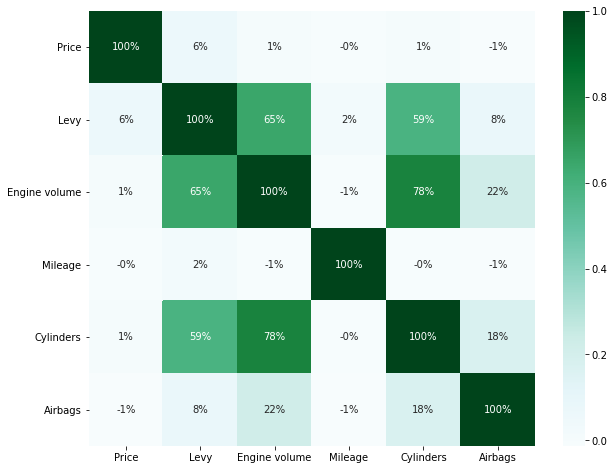

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),cmap='BuGn',annot=True,fmt='.0%')

<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

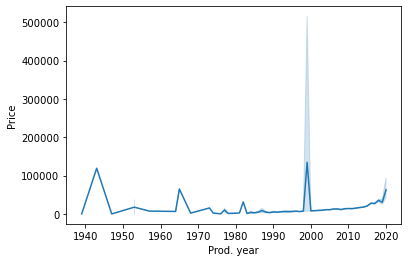

In [10]:
sns.lineplot(x='Prod. year' , y='Price',data=df)

# Handling categorical features : 

In [11]:
df.select_dtypes(object)

,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,LEXUS,2010,Jeep,Yes,Hybrid,Automatic,4x4,four to five,Left wheel,Silver
1,CHEVROLET,2011,Jeep,No,Petrol,Tiptronic,4x4,four to five,Left wheel,Black
2,HONDA,2006,Hatchback,No,Petrol,Variator,Front,four to five,Right-hand drive,Black
3,FORD,2011,Jeep,Yes,Hybrid,Automatic,4x4,four to five,Left wheel,White
4,HONDA,2014,Hatchback,Yes,Petrol,Automatic,Front,four to five,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,1999,Coupe,Yes,CNG,Manual,Rear,two to three,Left wheel,Silver
19233,HYUNDAI,2011,Sedan,Yes,Petrol,Tiptronic,Front,four to five,Left wheel,Red
19234,HYUNDAI,2010,Jeep,Yes,Diesel,Automatic,Front,four to five,Left wheel,Grey
19235,CHEVROLET,2007,Jeep,Yes,Diesel,Automatic,Front,four to five,Left wheel,Black


In [12]:
df.select_dtypes(object).nunique()

Manufacturer        65
Prod. year          54
Category            11
Leather interior     2
Fuel type            7
Gear box type        4
Drive wheels         3
Doors                3
Wheel                2
Color               16
dtype: int64

In [13]:
#Manufacturer        65 ⚠️

#Prod. year          54 ⚠️

#Category            11
#Leather interior     2
#Fuel type            7
#Gear box type        4
#Drive wheels         3
#Doors                3
#Wheel                2

#Color               16 ⚠️

## Considering only top 8 Manufacturers for dummy variable columns: 

In [14]:
df.Manufacturer.value_counts().head(8)

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
Name: Manufacturer, dtype: int64

In [15]:
df.Manufacturer.value_counts().head(8).index.to_list()

['HYUNDAI',
 'TOYOTA',
 'MERCEDES-BENZ',
 'FORD',
 'CHEVROLET',
 'BMW',
 'LEXUS',
 'HONDA']

In [16]:
top_8_company = df.Manufacturer.value_counts().head(8).index.to_list()

In [17]:
def dummy_maker(data,col_name):
    
    for label in top_8_company:
        
        data[col_name + '_' + label] = np.where(df[col_name]==label,1,0)

In [18]:
dummy_maker(df,'Manufacturer')

In [19]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Color,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_FORD,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6,...,Silver,12,0,0,0,0,0,0,1,0
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6,...,Black,8,0,0,0,0,1,0,0,0
2,8467,NaN,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4,...,Black,2,0,0,0,0,0,0,0,1
3,3607,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4,...,White,0,0,0,0,1,0,0,0,0
4,11726,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4,...,Silver,4,0,0,0,0,0,0,0,1


## Considering only top 6 Colors for dummy  variable columns: 

In [20]:
df.Color.value_counts().head(6).index.to_list()

['Black', 'White', 'Silver', 'Grey', 'Blue', 'Red']

In [21]:
top_colors = df.Color.value_counts().head(6).index.to_list()

In [22]:
def dummy_maker(data,col_name):
    
    for label in top_colors:
        
        data[col_name + '_' + label] = np.where(df[col_name]==label,1,0)

In [23]:
dummy_maker(df,'Color')

In [24]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6,...,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6,...,1,0,0,0,1,0,0,0,0,0
2,8467,NaN,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4,...,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4,...,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4,...,0,0,0,1,0,0,1,0,0,0


## dropping the parent categorical columns from df

In [25]:
del df['Manufacturer'] , df['Color']

In [26]:
df.shape

(19237, 28)

In [27]:
#Manufacturer        65 ⚠️✅

#Prod. year          54 ⚠️

#Category            11
#Leather interior     2
#Fuel type            7
#Gear box type        4
#Drive wheels         3
#Doors                3
#Wheel                2

#Color               16 ⚠️✅

In [28]:
df.select_dtypes(object).columns

Index(['Prod. year', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel'],
      dtype='object')

## creating dummy columns directly for the features having less unique value in each column

In [29]:
pd.get_dummies(df[['Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel']],drop_first=True)

,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,...,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_four to five,Doors_two to three,Wheel_Right-hand drive
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
19233,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
19234,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
19235,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [30]:
dummy_df = pd.get_dummies(df[['Category', 'Leather interior', 'Fuel type','Gear box type', 
                              'Drive wheels', 'Doors', 'Wheel']],drop_first=True) 
                            #will concat with cleaned numerical data at the end.

In [31]:
df.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,...,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,...,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,...,1,0,0,0,1,0,0,0,0,0
2,8467,NaN,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,...,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,...,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,...,0,0,0,1,0,0,1,0,0,0


## dropping the parent categorical columns from df

In [32]:
df.drop(['Category', 'Leather interior', 'Fuel type','Gear box type', 'Drive wheels', 'Doors', 'Wheel'],axis=1,inplace=True)

In [33]:
df.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,...,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,2010,3.5,186005,6,12,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,2011,3.0,192000,6,8,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,8467,NaN,2006,1.3,200000,4,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,2011,2.5,168966,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,2014,1.3,91901,4,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Handling Numerical features : 

In [34]:
df.select_dtypes(['float64','int64'])

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags
0,13328,1399.0,3.5,186005,6,12
1,16621,1018.0,3.0,192000,6,8
2,8467,NaN,1.3,200000,4,2
3,3607,862.0,2.5,168966,4,0
4,11726,446.0,1.3,91901,4,4
...,...,...,...,...,...,...
19232,8467,NaN,2.0,300000,4,5
19233,15681,831.0,2.4,161600,4,8
19234,26108,836.0,2.0,116365,4,4
19235,5331,1288.0,2.0,51258,4,4


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
Standardised_mileage = scaler.fit_transform(df['Mileage'].values.reshape(-1,1))

In [38]:
Standardised_mileage

array([[-0.02781318],
       [-0.02768933],
       [-0.02752405],
       ...,
       [-0.02925195],
       [-0.03059706],
       [-0.02779422]])

In [39]:
df.insert(2,'Scaled_Mileage',Standardised_mileage)

In [40]:
del df['Mileage']

In [41]:
df.head()

,Price,Levy,Scaled_Mileage,Prod. year,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,...,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,-0.027813,2010,3.5,6,12,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,-0.027689,2011,3.0,6,8,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,8467,NaN,-0.027524,2006,1.3,4,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,-0.028165,2011,2.5,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,-0.029757,2014,1.3,4,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## checking for missing values :

In [42]:
df.isna().sum()

Price                            0
Levy                          5819
Scaled_Mileage                   0
Prod. year                       0
Engine volume                    0
Cylinders                        0
Airbags                          0
Manufacturer_HYUNDAI             0
Manufacturer_TOYOTA              0
Manufacturer_MERCEDES-BENZ       0
Manufacturer_FORD                0
Manufacturer_CHEVROLET           0
Manufacturer_BMW                 0
Manufacturer_LEXUS               0
Manufacturer_HONDA               0
Color_Black                      0
Color_White                      0
Color_Silver                     0
Color_Grey                       0
Color_Blue                       0
Color_Red                        0
dtype: int64

In [43]:
df.head()

,Price,Levy,Scaled_Mileage,Prod. year,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,...,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,-0.027813,2010,3.5,6,12,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,-0.027689,2011,3.0,6,8,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,8467,NaN,-0.027524,2006,1.3,4,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,-0.028165,2011,2.5,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,-0.029757,2014,1.3,4,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## Filling missing values of "Levy" column using KnnImputer

In [44]:
from sklearn.impute import KNNImputer

In [45]:
knn_imputer = KNNImputer(n_neighbors=5)

In [46]:
df.select_dtypes(exclude='object')

,Price,Levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_FORD,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,-0.027813,3.5,6,12,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,-0.027689,3.0,6,8,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,8467,NaN,-0.027524,1.3,4,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,-0.028165,2.5,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,-0.029757,1.3,4,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,-0.025458,2.0,4,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0
19233,15681,831.0,-0.028317,2.4,4,8,1,0,0,0,0,0,0,0,0,0,0,0,0,1
19234,26108,836.0,-0.029252,2.0,4,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0
19235,5331,1288.0,-0.030597,2.0,4,4,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [47]:
knn_imputed_array = knn_imputer.fit_transform(df.select_dtypes(exclude='object'))

In [48]:
df.select_dtypes(exclude='object').columns

Index(['Price', 'Levy', 'Scaled_Mileage', 'Engine volume', 'Cylinders',
       'Airbags', 'Manufacturer_HYUNDAI', 'Manufacturer_TOYOTA',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_FORD',
       'Manufacturer_CHEVROLET', 'Manufacturer_BMW', 'Manufacturer_LEXUS',
       'Manufacturer_HONDA', 'Color_Black', 'Color_White', 'Color_Silver',
       'Color_Grey', 'Color_Blue', 'Color_Red'],
      dtype='object')

In [49]:
imputed_df = pd.DataFrame(knn_imputed_array,columns=df.select_dtypes(exclude='object').columns)

In [50]:
imputed_df.head()

,Price,Levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_FORD,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328.0,1399.0,-0.027813,3.5,6.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16621.0,1018.0,-0.027689,3.0,6.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8467.0,1037.2,-0.027524,1.3,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3607.0,862.0,-0.028165,2.5,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11726.0,446.0,-0.029757,1.3,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
df.head()

,Price,Levy,Scaled_Mileage,Prod. year,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,...,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,-0.027813,2010,3.5,6,12,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,-0.027689,2011,3.0,6,8,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,8467,NaN,-0.027524,2006,1.3,4,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,-0.028165,2011,2.5,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,-0.029757,2014,1.3,4,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [52]:
df.select_dtypes(object)

,Prod. year
0,2010
1,2011
2,2006
3,2011
4,2014
...,...
19232,1999
19233,2011
19234,2010
19235,2007


# dropping 'Prod. year' column

In [53]:
del  df['Prod. year']

In [54]:
df.head()

,Price,Levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_FORD,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,-0.027813,3.5,6,12,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,-0.027689,3.0,6,8,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,8467,NaN,-0.027524,1.3,4,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,-0.028165,2.5,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,-0.029757,1.3,4,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0


## replacing older 'Levy' column with new 'Levy' column from imputed_df data

In [55]:
del df['Levy']

In [56]:
df.insert(1,'Levy',imputed_df['Levy'])

In [57]:
df.head()

,Price,Levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_FORD,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,13328,1399.0,-0.027813,3.5,6,12,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,16621,1018.0,-0.027689,3.0,6,8,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,8467,1037.2,-0.027524,1.3,4,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,3607,862.0,-0.028165,2.5,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,11726,446.0,-0.029757,1.3,4,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0


## Standard scaling Price & Levy as well

In [58]:
standardised_price = scaler.transform(df['Price'].values.reshape(-1,1))

In [59]:
df.insert(0,'scaled_price',standardised_price)

In [60]:
df.head()

,scaled_price,Price,Levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,...,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,-0.031381,13328,1399.0,-0.027813,3.5,6,12,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,-0.031313,16621,1018.0,-0.027689,3.0,6,8,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-0.031481,8467,1037.2,-0.027524,1.3,4,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,-0.031582,3607,862.0,-0.028165,2.5,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.031414,11726,446.0,-0.029757,1.3,4,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [61]:
del df['Price']

In [62]:
df.head()

,scaled_price,Levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_FORD,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,-0.031381,1399.0,-0.027813,3.5,6,12,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,-0.031313,1018.0,-0.027689,3.0,6,8,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,-0.031481,1037.2,-0.027524,1.3,4,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,-0.031582,862.0,-0.028165,2.5,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,-0.031414,446.0,-0.029757,1.3,4,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [63]:
standadised_levy = scaler.transform(df['Levy'].values.reshape(-1,1))

In [64]:
df.insert(1,'scaled_levy',standadised_levy)

In [65]:
df.head()

,scaled_price,scaled_levy,Levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,...,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,-0.031381,-0.031627,1399.0,-0.027813,3.5,6,12,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,-0.031313,-0.031635,1018.0,-0.027689,3.0,6,8,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-0.031481,-0.031635,1037.2,-0.027524,1.3,4,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,-0.031582,-0.031638,862.0,-0.028165,2.5,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.031414,-0.031647,446.0,-0.029757,1.3,4,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [66]:
del df['Levy']

In [67]:
df.head()

,scaled_price,scaled_levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_FORD,Manufacturer_CHEVROLET,Manufacturer_BMW,Manufacturer_LEXUS,Manufacturer_HONDA,Color_Black,Color_White,Color_Silver,Color_Grey,Color_Blue,Color_Red
0,-0.031381,-0.031627,-0.027813,3.5,6,12,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,-0.031313,-0.031635,-0.027689,3.0,6,8,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,-0.031481,-0.031635,-0.027524,1.3,4,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,-0.031582,-0.031638,-0.028165,2.5,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,-0.031414,-0.031647,-0.029757,1.3,4,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [68]:
dummy_df # extracted previously while handling categorical features

,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,...,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_four to five,Doors_two to three,Wheel_Right-hand drive
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
19233,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
19234,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
19235,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


# Merging df & dummied_df

In [69]:
df = pd.concat([df,dummy_df],axis=1)

In [70]:
df.head()

,scaled_price,scaled_levy,Scaled_Mileage,Engine volume,Cylinders,Airbags,Manufacturer_HYUNDAI,Manufacturer_TOYOTA,Manufacturer_MERCEDES-BENZ,Manufacturer_FORD,...,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_four to five,Doors_two to three,Wheel_Right-hand drive
0,-0.031381,-0.031627,-0.027813,3.5,6,12,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.031313,-0.031635,-0.027689,3.0,6,8,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,-0.031481,-0.031635,-0.027524,1.3,4,2,0,0,0,0,...,1,0,0,0,1,1,0,1,0,1
3,-0.031582,-0.031638,-0.028165,2.5,4,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.031414,-0.031647,-0.029757,1.3,4,4,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [71]:
df.columns

Index(['scaled_price', 'scaled_levy', 'Scaled_Mileage', 'Engine volume',
       'Cylinders', 'Airbags', 'Manufacturer_HYUNDAI', 'Manufacturer_TOYOTA',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_FORD',
       'Manufacturer_CHEVROLET', 'Manufacturer_BMW', 'Manufacturer_LEXUS',
       'Manufacturer_HONDA', 'Color_Black', 'Color_White', 'Color_Silver',
       'Color_Grey', 'Color_Blue', 'Color_Red', 'Category_Coupe',
       'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep',
       'Category_Limousine', 'Category_Microbus', 'Category_Minivan',
       'Category_Pickup', 'Category_Sedan', 'Category_Universal',
       'Leather interior_Yes', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Doors_four to five',
       'Doors_two to three', 'Wheel_Right

In [72]:
X = df.drop('scaled_price',axis=1).values
y=df['scaled_price'].values

In [73]:
X

array([[-0.03162715, -0.02781318,  3.5       , ...,  1.        ,
         0.        ,  0.        ],
       [-0.03163502, -0.02768933,  3.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.03163463, -0.02752405,  1.3       , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.03163878, -0.02925195,  2.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.03162944, -0.03059706,  2.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.0316405 , -0.02779422,  2.4       , ...,  1.        ,
         0.        ,  0.        ]])

In [74]:
X.shape

(19237, 44)

In [75]:
y

array([-0.0313807 , -0.03131266, -0.03148113, ..., -0.03111666,
       -0.03154592, -0.03164634])

In [76]:
y.shape

(19237,)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modelling using XGBOOST

In [79]:
import xgboost as xg

In [80]:
xgb_r = xg.XGBRegressor(n_estimators = 1000, seed = 123)

In [81]:
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [82]:
pred = xgb_r.predict(X_test)

In [83]:
inv_y_test = scaler.inverse_transform(y_test)

In [84]:
inv_pred = scaler.inverse_transform(pred)

In [85]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

### mean_squared_error

In [86]:
mean_squared_error(y_test,pred)

9.29642869119289e-08

### root_mean_squared_error

In [87]:
np.sqrt(mean_squared_error(y_test,pred))

0.0003049004541025298

### mean_squared_log_error

In [88]:
mean_squared_log_error(inv_y_test,inv_pred)

1.949289580468718

### root_mean_squared_log_error 🧧🧧🧧Hackathon Metric🧧🧧🧧

In [89]:
np.sqrt(mean_squared_log_error(inv_y_test,inv_pred))

1.3961696102081287

### r2 score

In [90]:
r2_score(y_test,pred)

0.4175345821386851

### adjusted r2 score

In [91]:
1 - ( 1-xgb_r.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )

0.413469150922648

# Visualising important features

In [92]:
xgb_r.feature_importances_

array([9.4961190e-01, 1.7191240e-03, 7.0173363e-04, 4.6220855e-04,
       1.3770151e-03, 6.4613507e-04, 2.9511785e-04, 5.8385707e-04,
       0.0000000e+00, 3.3273542e-04, 4.2424639e-04, 2.0139532e-04,
       5.4157007e-04, 0.0000000e+00, 3.4165350e-04, 4.5873676e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.1324447e-03,
       2.4913026e-02, 0.0000000e+00, 3.9554969e-03, 0.0000000e+00,
       3.6820074e-04, 2.1708909e-04, 3.4168482e-04, 5.3796661e-04,
       3.8552412e-03, 1.2248789e-03, 9.1443222e-04, 2.4236193e-04,
       0.0000000e+00, 2.6025457e-04, 2.4508391e-04, 2.5943478e-04,
       3.7294585e-04, 1.9032507e-03, 3.1481482e-04, 6.6160335e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.8236375e-04],
      dtype=float32)

In [93]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

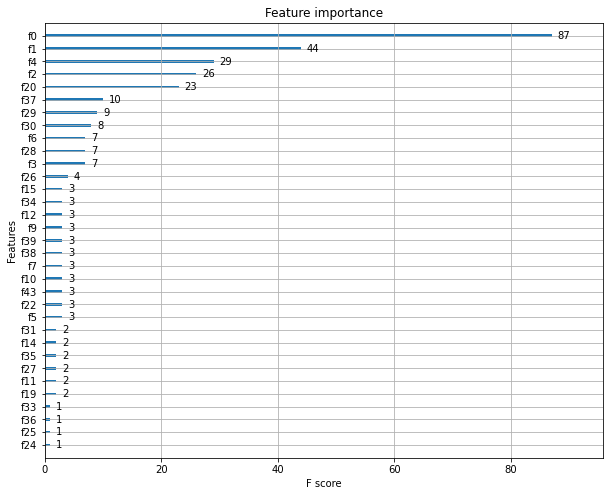

In [94]:
fig,ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_r,ax=ax)

# Need to Label the features

In [95]:
df.columns

Index(['scaled_price', 'scaled_levy', 'Scaled_Mileage', 'Engine volume',
       'Cylinders', 'Airbags', 'Manufacturer_HYUNDAI', 'Manufacturer_TOYOTA',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_FORD',
       'Manufacturer_CHEVROLET', 'Manufacturer_BMW', 'Manufacturer_LEXUS',
       'Manufacturer_HONDA', 'Color_Black', 'Color_White', 'Color_Silver',
       'Color_Grey', 'Color_Blue', 'Color_Red', 'Category_Coupe',
       'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep',
       'Category_Limousine', 'Category_Microbus', 'Category_Minivan',
       'Category_Pickup', 'Category_Sedan', 'Category_Universal',
       'Leather interior_Yes', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Doors_four to five',
       'Doors_two to three', 'Wheel_Right

In [96]:
col_list = ['scaled_levy', 'Scaled_Mileage', 'Engine volume',
       'Cylinders', 'Airbags', 'Manufacturer_HYUNDAI', 'Manufacturer_TOYOTA',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_FORD',
       'Manufacturer_CHEVROLET', 'Manufacturer_BMW', 'Manufacturer_LEXUS',
       'Manufacturer_HONDA', 'Color_Black', 'Color_White', 'Color_Silver',
       'Color_Grey', 'Color_Blue', 'Color_Red', 'Category_Coupe',
       'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep',
       'Category_Limousine', 'Category_Microbus', 'Category_Minivan',
       'Category_Pickup', 'Category_Sedan', 'Category_Universal',
       'Leather interior_Yes', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Doors_four to five',
       'Doors_two to three', 'Wheel_Right-hand drive']

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

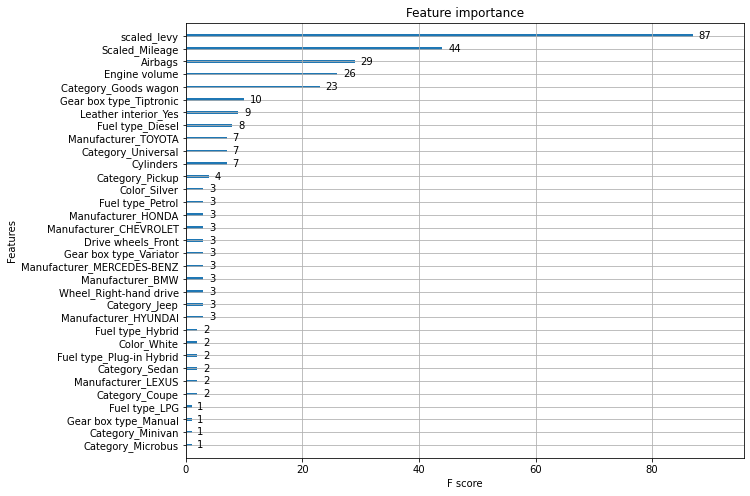

In [97]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(xgb_r, 'xgb_r.pkl')
 
# Load the model from the file
model = joblib.load("xgb_r.pkl")
model.get_booster().feature_names = col_list

fig,ax = plt.subplots(figsize=(10,8))
plot_importance(model.get_booster(),ax=ax)

# HyperParameter tuning

In [98]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [99]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [100]:
random_search=RandomizedSearchCV(xgb_r,param_distributions=params,n_iter=5,
                                 scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [101]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=1000, n_jobs=4,
                                          num_pa...
                                          scale_pos_weight=1, seed=123,
                                          subsample=1, tree_method='exact',

In [102]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [103]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [104]:
new_xgb_r = xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=np.nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
new_xgb_r.fit(X_train,y_train)

[20:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
predics = new_xgb_r.predict(X_test)

In [107]:
actual_price = scaler.inverse_transform(predics)

In [108]:
actual_price # 🚩🚩🚩🚩🚩 Predicting the same output throughout !!!!!

array([19197.188, 19197.188, 19197.188, ..., 19197.188, 19197.188,
       19197.188], dtype=float32)

### mean_squared_log_error (After Hyper-Parameter Tuning)

In [109]:
mean_squared_log_error(inv_y_test,actual_price)

3.118028852180318

### root_mean_squared_log_error (After Hyper-Parameter Tuning)  🧧🧧🧧Hackathon Metric🧧🧧🧧

In [110]:
np.sqrt(mean_squared_log_error(inv_y_test,actual_price))

1.7657941137574102

### mean_squared_error (After Hyper-Parameter Tuning)

In [111]:
mean_squared_error(inv_y_test,actual_price)

377697204.4270684

### root_mean_squared_error (After Hyper-Parameter Tuning)

In [112]:
np.sqrt(mean_squared_error(inv_y_test,actual_price))

19434.433473272857

# Hypothesis building

In [113]:
hyp_data = pd.read_csv('train_excel_cleaned.csv')

In [114]:
hyp_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,four to five,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,four to five,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,four to five,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,four to five,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,four to five,Left wheel,Silver,4


In [115]:
del hyp_data['ID'] , hyp_data['Prod. year']

In [116]:
hyp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  int64  
 9   Cylinders         19237 non-null  int64  
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memo

In [117]:
hyp_data.select_dtypes(['float64','int64'])

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags
0,13328,1399.0,3.5,186005,6,12
1,16621,1018.0,3.0,192000,6,8
2,8467,NaN,1.3,200000,4,2
3,3607,862.0,2.5,168966,4,0
4,11726,446.0,1.3,91901,4,4
...,...,...,...,...,...,...
19232,8467,NaN,2.0,300000,4,5
19233,15681,831.0,2.4,161600,4,8
19234,26108,836.0,2.0,116365,4,4
19235,5331,1288.0,2.0,51258,4,4


In [118]:
del hyp_data['Levy']

In [119]:
hyp_data['Levy'] = imputed_df['Levy']

In [120]:
hyp_data.select_dtypes(['float64','int64'])

,Price,Engine volume,Mileage,Cylinders,Airbags,Levy
0,13328,3.5,186005,6,12,1399.0
1,16621,3.0,192000,6,8,1018.0
2,8467,1.3,200000,4,2,1037.2
3,3607,2.5,168966,4,0,862.0
4,11726,1.3,91901,4,4,446.0
...,...,...,...,...,...,...
19232,8467,2.0,300000,4,5,780.4
19233,15681,2.4,161600,4,8,831.0
19234,26108,2.0,116365,4,4,836.0
19235,5331,2.0,51258,4,4,1288.0


In [121]:
hyp_data.select_dtypes(['float64','int64']).columns

Index(['Price', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Levy'], dtype='object')

In [122]:
num_cols = ['Price', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Levy']

In [123]:
# One Liner Hypothesis :
    
#Price increases with Engine volume
#Price increases with Mileage
#Price increases with Cylinders
#Price increases with Airbags
#Price increases with Levy

<AxesSubplot:xlabel='Engine volume', ylabel='Price'>

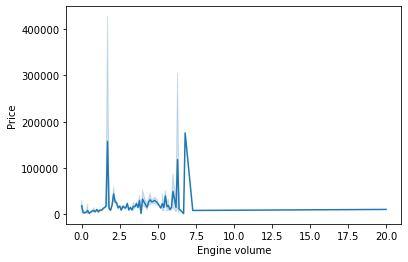

In [124]:
sns.lineplot(x='Engine volume',y='Price',data=hyp_data.select_dtypes(['float64','int64']))

In [125]:
hyp_data.insert(1,'scaled_mileage',Standardised_mileage)

In [126]:
del hyp_data['Mileage']

<AxesSubplot:xlabel='scaled_mileage', ylabel='Price'>

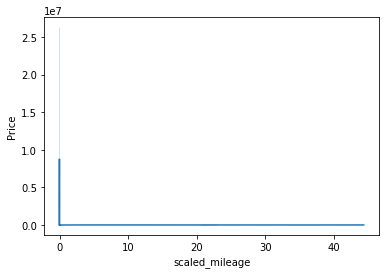

In [127]:
sns.lineplot(x='scaled_mileage',y='Price',data=hyp_data.select_dtypes(['float64','int64']))

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

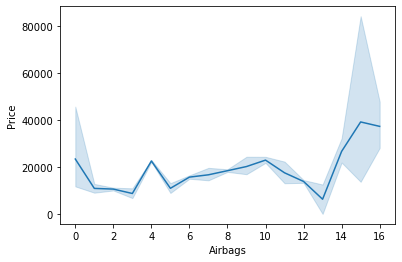

In [128]:
sns.lineplot(x='Airbags',y='Price',data=hyp_data.select_dtypes(['float64','int64']))

<AxesSubplot:xlabel='Levy', ylabel='Price'>

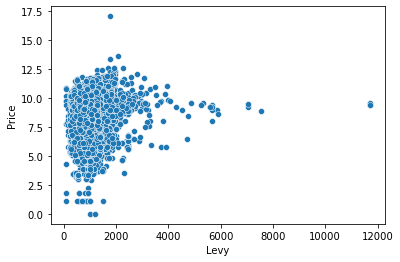

In [129]:
sns.scatterplot(x='Levy',y=np.log(hyp_data['Price']),data=hyp_data.select_dtypes(['float64','int64']))